In [59]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from scipy import stats
from statsmodels.formula.api import ols, glm

In [60]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [61]:
boston=pd.DataFrame(data)
boston.columns=['CRIN','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
boston['MEDV']=target
boston

,CRIN,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [62]:
boston_chas_0=boston.loc[boston['CHAS']==0,'MEDV']
boston_chas_1=boston.loc[boston['CHAS']==1,'MEDV']
print(boston.shape)
print(boston_chas_0.shape)
print(boston_chas_1.shape)

(506, 14)
(471,)
(35,)


In [63]:
stats.ttest_ind(boston_chas_0,boston_chas_1)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

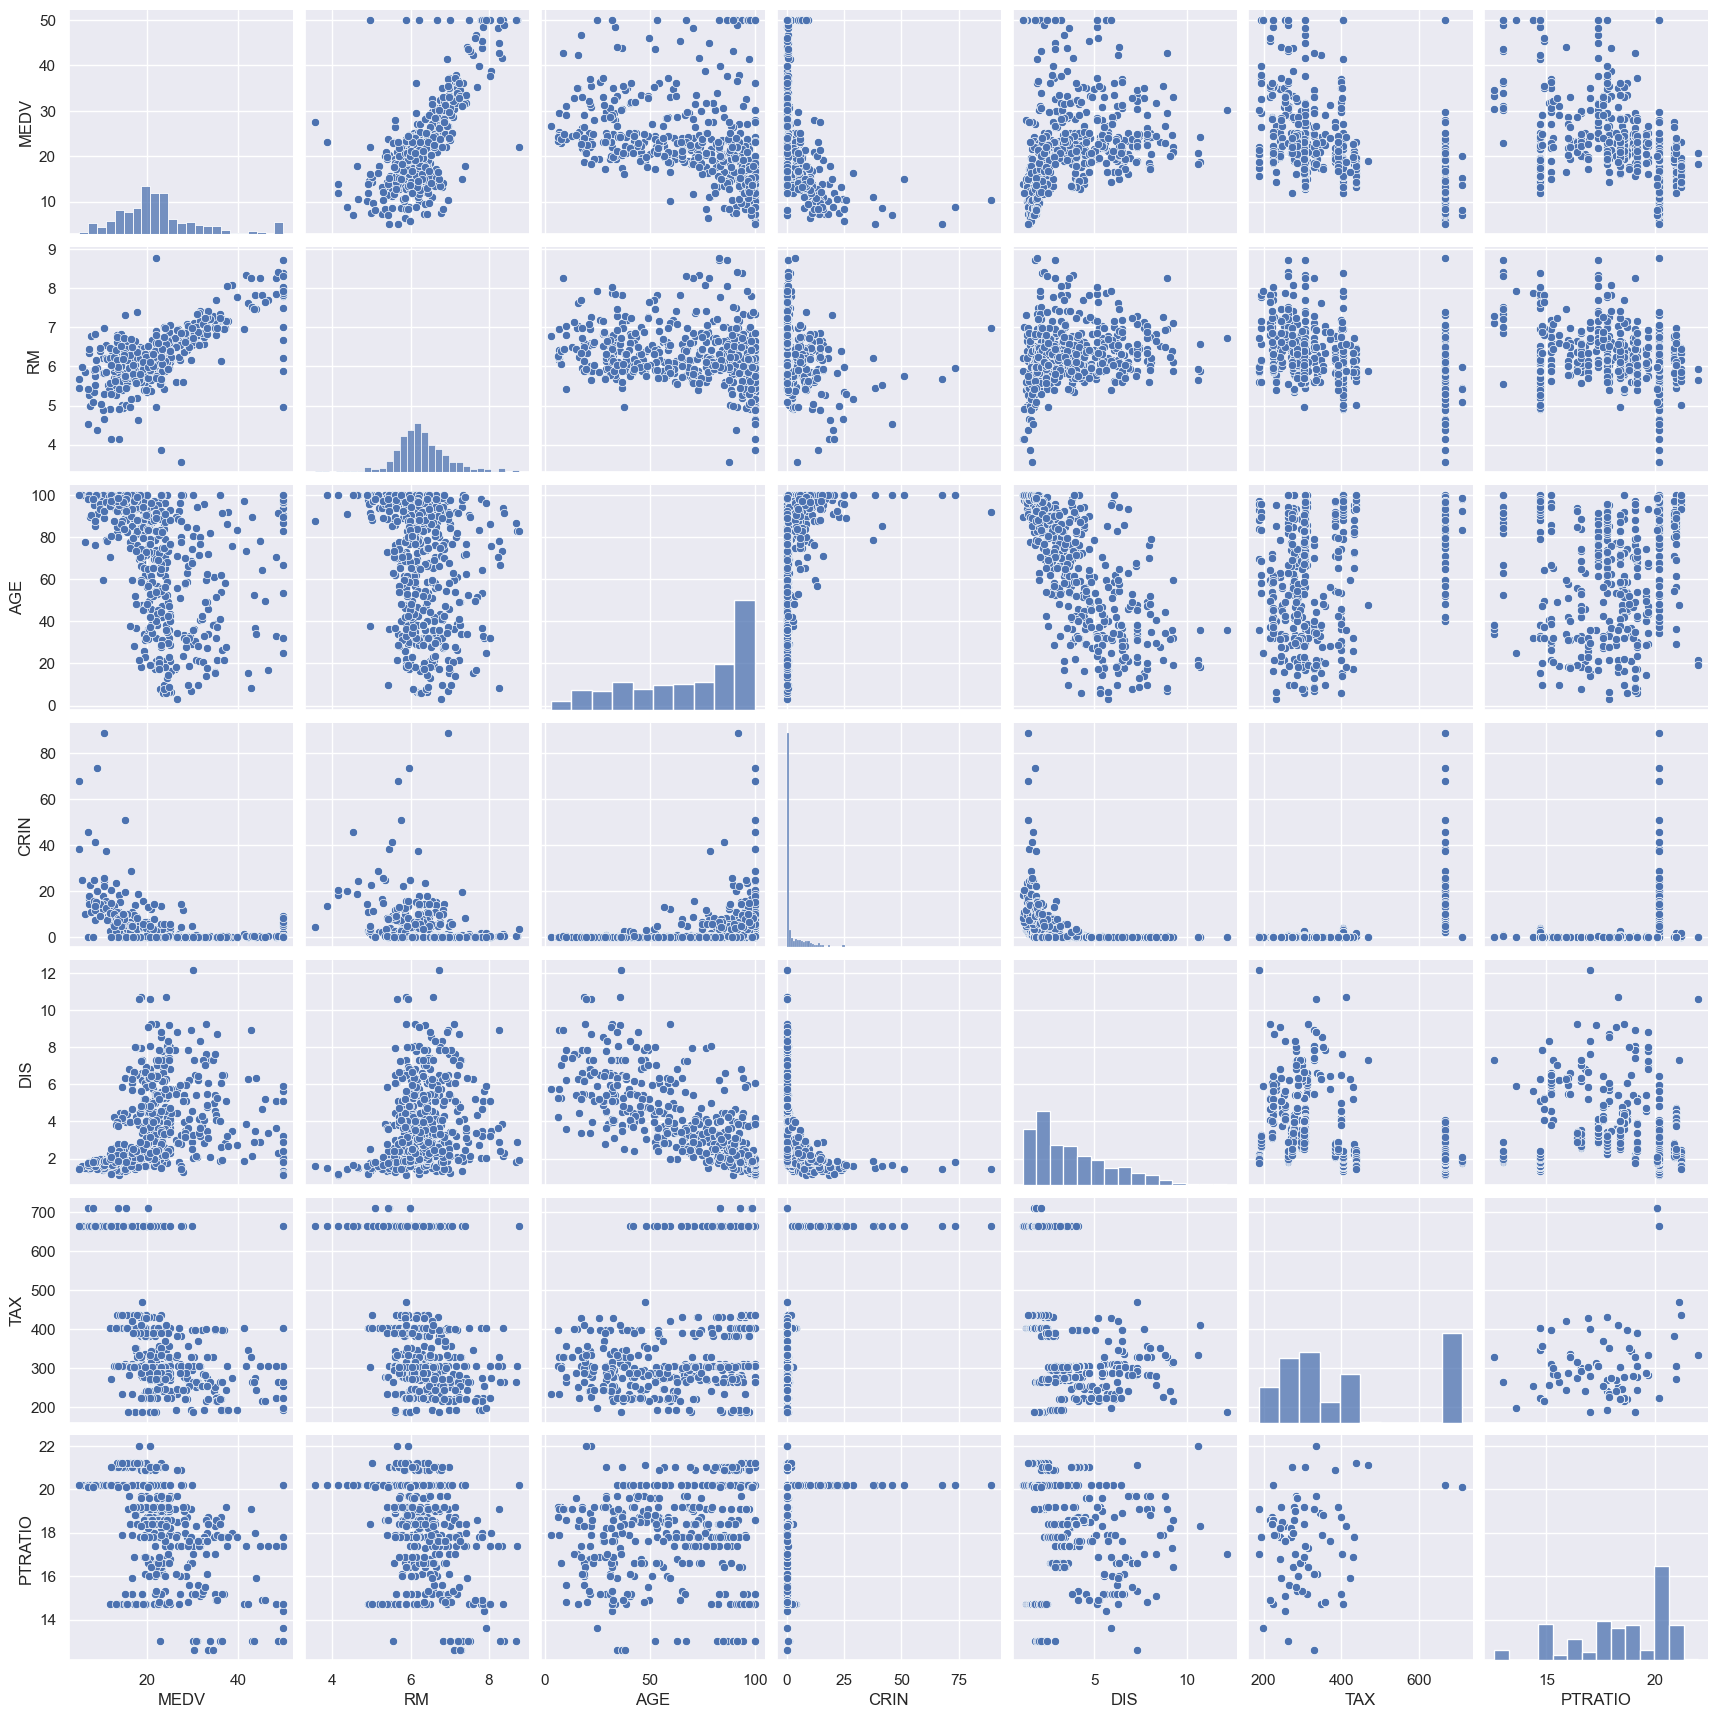

In [64]:
sns.pairplot(boston[['MEDV','RM','AGE','CRIN','DIS','TAX','PTRATIO']])

In [65]:
# formula = 'MEDV ~ CRIN + ZN + INDUS + \
#       CHAS + NOX + RM + AGE + \
#       DIS + B + RAD + TAX + PTRATIO + LSTAT'

formula = 'MEDV ~ CRIN + ZN + INDUS + \
       NOX + RM + AGE + \
      DIS + RAD + TAX + PTRATIO + LSTAT'


In [66]:
regression_result=ols(formula,data=boston).fit()



In [67]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          3.71e-132
Time:                        14:16:48   Log-Likelihood:                -1510.3
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     494   BIC:                             3095.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.3279      4.979      8.501      0.000      32.545      52.111
CRIN          -0.1275      0.033     -3.832      0.000      -0.193      -0.062
ZN             0.0477      0.014      3.401      0.001       0.020       0.075
INDUS          0.0341      0.062      0.546      0.586      -0.089       0.157
NOX          -18.3830      3.887     -4.729      0.000     -26.020     -10.746
RM             3.6938      0.424      8.708      0.000       2.860       4.527
AGE            0.0060      0.013      0.444      0.657      -0.020       0.032
DIS           -1.5019      0.204     -7.378      0.000      -1.902      -1.102
RAD            0.3122      0.067      4.646      0.000       0.180       0.444
TAX           -0.0142      0.004     -3.729      0.000      -0.022      -0.007
PTRATIO       -0.9773      0.133     -7.352      0.000      -1.238      -0.716
LSTAT         -0.5633      0.051    -11.038      0.000      -0.664      -0.463
==============================================================================
Omnibus:                      184.695   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              825.313
Skew:                           1.579   Prob(JB):                    6.10e-180
Kurtosis:                       8.401   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
sample=boston[boston.columns.difference(['B','CHAS','MEDV'])]
sample1=sample[0:5][:]
sample1

,AGE,CRIN,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,65.2,0.00632,4.0900,2.31,4.98,0.538,15.3,1.0,6.575,296.0,18.0
1,78.9,0.02731,4.9671,7.07,9.14,0.469,17.8,2.0,6.421,242.0,0.0
2,61.1,0.02729,4.9671,7.07,4.03,0.469,17.8,2.0,7.185,242.0,0.0
3,45.8,0.03237,6.0622,2.18,2.94,0.458,18.7,3.0,6.998,222.0,0.0
4,54.2,0.06905,6.0622,2.18,5.33,0.458,18.7,3.0,7.147,222.0,0.0


In [69]:
smaple_predict=regression_result.predict(sample1)
print(smaple_predict)

0    30.256206
1    25.314495
2    30.908792
3    28.847775
4    28.097296
dtype: float64


In [70]:
boston[0:5]['MEDV']

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [71]:
data={'CRIN':[0.062,0.045],'ZN':[0.0,0.0],'INDUS':[11.9,11.8],'CHAS':[0,0],
      'NOX':[0.56,0.57], 'RM':[6.59,6.12], 'AGE':[69.1,76.1], 'DIS':[2.45,2.47],
      'RAD':[1.0,1.0], 'TAX':[21.0,21.0], 'PTRATIO':[21.0,21.0], 'LSTAT':[9.6,9.0]}


In [72]:
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2

,AGE,CRIN,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,69.1,0.062,2.45,11.9,9.6,0.56,21.0,1.0,6.59,21.0,0.0
1,76.1,0.045,2.47,11.8,9.0,0.57,21.0,1.0,6.12,21.0,0.0


In [73]:
sample2_predict=regression_result.predict(sample2)
print(sample2_predict)

0    27.588590
1    26.017199
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


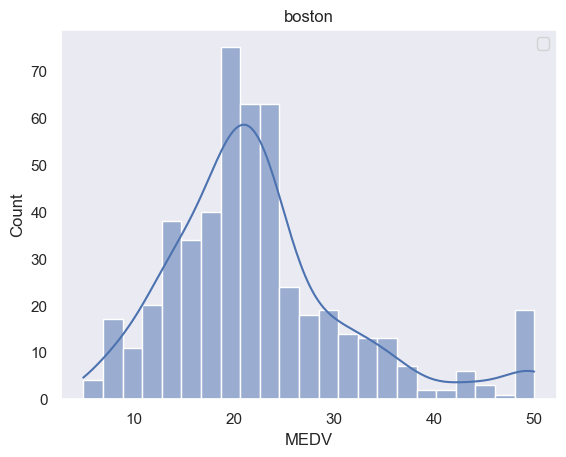

In [74]:
sns.set_style('dark')
sns.histplot(data=boston['MEDV'], kde=True)
plt.title("boston")
plt.legend()
plt.show()


1. boston 평균집값[MEDV]에 대한 RM(주택당 방수)이 미치는 영향을 회귀부분 차트로 작성하라.
2. boston 집값 회귀분석 값을 사용하여 각 필드가 집값에 미치는 영향을 회귀분석 부분 그리드 그래프(plot_partregress_grid)를 작성하라

In [78]:
import statsmodels.api as sm

eval_env: 1


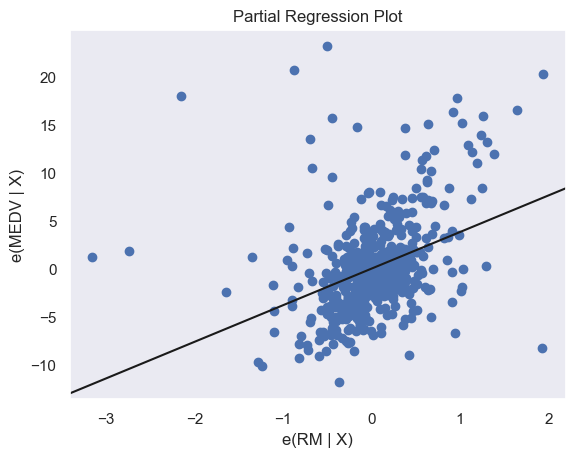

In [80]:
others=list(set(boston.columns).difference(set(['MEDV','RM'])))
p, resids=sm.graphics.plot_partregress('MEDV','RM', others, data=boston, obs_labels=False, ret_coords=True)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


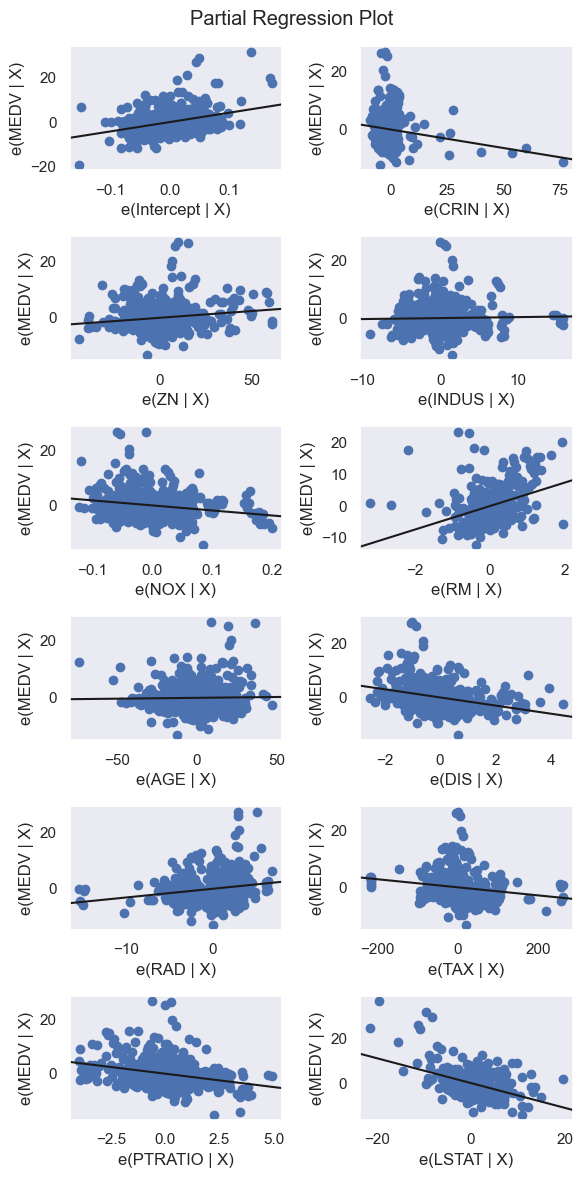

In [81]:
fig=plt.figure(figsize=(6,12))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()